### [AQ2] Considering the following problem, answer the questions:

##### Alex has a ribbon of length N. He wants to cut the ribbon in a way that fulfils the following three conditions:

##### Each piece of the cut should have an integer length
##### He should at least cut the ribbon once
##### The multiplication of the length of all the pieces be the maximum possible

#### 1. Implement a recursive algorithm to help Alex find the maximum possible value after multiplying the length of the pieces. Explain your algorithm in detail.

##### ribbon_pieces is the recursive function that is going to be in charge of using max() to solve condition 3 of the problem statement.

##### max() funcion returns the item with the highest value of the multiplication of the parts.

##### The ribbon cannot be of negative length and cannot be less than 1 to meet conditions 1 and 2. This is why the first base case was made.

##### A for loop is set to iterate piece in the range of N (ribbon len). The range of the iteration is going to be from 1 to N-1 to be able to apply recursion without reaching N = 1. When N = 2, the only solution is to cut the ribbon into 2 parts (1 and 1) so it returns 1 and would be the second base case.

##### The ribbon begins to be cut in "piece" and the remainder of the ribbon is "N - piece". Recursion is performed in this second part of the ribbon to choose the maximum value that results from the multiplication of the cuts by doing comparisons. This result is saved in the variable "recursive_path". As the for loop progresses, the variable "ans_max" will choose between which multiplication is greater, if the one that is being done now or the one that was done in the previous iteration.


In [25]:
def ribbon_pieces(N):

    ans_max = 1

    #Base cases:
    if (N <= 1):
        return 0
    
    if (N == 2):
        return 1
    
    #range from 1 to N: to be able to apply recursion without reaching N = 1.
    for piece in range(1, N-1):

        recursive_path = max(piece * (N-piece), piece * ribbon_pieces(N-piece))
        
        ans_max = max(ans_max, recursive_path)
    

    return ans_max

N= int(input().strip())

ribbon_pieces(N)

36

#### 2. Show that the algorithm has exponential running time.

##### To show that the time complexity of the algorithm is exponential, a recursion tree was made:

<img src= 'ADMHW2AQ2.png'>

##### This is the recursion tree of ribbon_pieces when N=7. 

#### Therefore, the time complexity if the algorithm is equal to: (The number of times the function is repeated was counted following the recursion tree)

$$ T(1) = 0 $$
$$ T(2) = T(1) + 1 = 1 $$
$$ T(3) = T(2) + 1 = 2 $$
$$ T(4) = T(3) + T(2) + 1 = 4 $$
$$ T(5) = T(4) + T(3) + T(2) + 1 = 8 $$
$$ T(6) = T(5) + T(4) + T(3) + T(2) + 1 = 16 $$
$$ T(7) = T(6) + T(5) + T(4) + T(3) + T(2) + 1 = 32 $$


$$ T(n) = \sum_{i=2}^{n-1} T(i) + 1 $$

$$ T(n) = 2^{n-2}  \ n>=2 $$

##### Math induction:



$$ T(2) = 2^{2-2} = 1 $$
$$ T(n) = 2^{n-2} $$
$$ T(n+1) = 2^{n+1-2} $$
$$ T(n+1) = \sum_{i=2}^{n+1-1} T(i) + 1 $$
$$ T(n+1) = T(n) + \sum_{i=2}^{n-1} T(i) + 1 $$
$$ T(n+1) = T(n) + T(n) $$
$$ T(n+1) = 2T(n) = 2(2^{n-2}) = 2^{n-1}



##### The result is that the time complexity has an exponencial running time: 
$$ 2^{n-1}

#### 3. Now provide a polynomial solution, based on dynamic programming, and compute its running-time complexity.

In [72]:
def ribbon_pieces_dynamic(N):

    #Base cases:
    if (N <= 1):
        return 0
    
    if (N == 2):
        return 1
    
    #list_ans will save all the results of the previous iterations
    list_ans = []

    for piece_len in range(0,N+1):
            
        a = 0
        list_ans.append(a)

    for piece_len in range(1,N+1):

        ans_max = 0
    
        for piece in range(1, piece_len):

             ans_max = max(ans_max, (list_ans[piece_len - piece]*piece))

             ans_max = max(ans_max, (piece_len - piece)*piece)

        list_ans[piece_len] = ans_max
    
    return list_ans[N]

N= int(input().strip())

ribbon_pieces_dynamic(N)

12

##### Since we are saving the values ​​of each traversal in the "list_ans" list, the time complexity would be as follows:

##### Without focusing on the for loop of the list, and only focusing on the double for, we get the execution time.

##### With N= 3, in the first for, the execution time would be:

$$ T(1) = 1 + 3(n+1) + 3n = 6n + 4 $$

##### The inner for execution time:

$$ T(2) = 1 + \frac{((n-1)*n)}{2} = \frac{(n^{2} - n + 2)}{2} $$

##### Total time execution:

$$ T(1) + T(2) = \frac{n^2 + 11n + 10}{2} $$

##### Therefore, the time complexity is:

$$ O(n^2)

#### 4. Evaluate the running time of your algorithm for the sizes (Ns) in the range of [2, 25], plot the results, and interpret it (if you have implemented two algorithms, please include both in the plot and compare them).

In [64]:
import time

def f1(x):
    ## f1 is the recursion algorithm
    ans = ribbon_pieces(x)
    return ans

def f2(x):
    ## f2 is the dynamic solution
    ans = ribbon_pieces_dynamic(x)
    return ans

def timed(f):
    
    def wrapper(n):
        start_time = time.time()
        ret = f(n)
        elapsed_time = time.time() - start_time
        return elapsed_time, ret
    
    return wrapper

timed_f1 = timed(f1)

timed_f2 = timed(f2)

#timed_f2(10)


In [65]:
import pandas as pd

result = pd.DataFrame([(*timed_f1(x), *timed_f2(x)) for x in range(2,26)], 
                        columns=["time_f1","result_f1","time_f2","result_f2"])

result.reset_index(inplace = True)

result

,index,time_f1,result_f1,time_f2,result_f2
0,0,0.000010,1,0.000002,1
1,1,0.000016,2,0.000004,2
2,2,0.000002,4,0.000005,4
3,3,0.000005,6,0.000007,6
4,4,0.000009,9,0.000009,9
5,5,0.000017,12,0.000011,12
6,6,0.000035,18,0.000015,18
7,7,0.000071,27,0.000018,27
8,8,0.000141,36,0.000022,36
9,9,0.000283,54,0.000025,54


<AxesSubplot:title={'center':'Execution time'}, xlabel='Ns', ylabel='Executon time'>

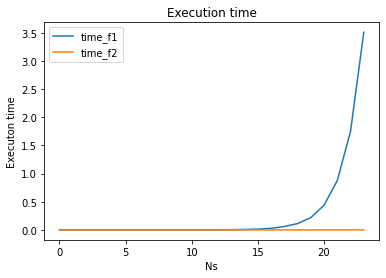

In [66]:
result.plot.line(x='index', y=['time_f1','time_f2'], title='Execution time',
                    xlabel='Ns', ylabel='Executon time')

##### As evidenced in the line graph, when the execution time is exponential, as the number of iterations increases, the execution time increases exponentially. On the other hand, f_2, which was the polynomial solution, has a very small increase in execution time, so it will be more efficient. Likewise, as shown in the "result" DataFrame, the results of both implementations are the same, so it can be concluded that you should always try to get a solution that has a polynomial execution time, and not an exponential one so that the algorithm can be more efficient.

#### 5. (Optional, mini bonus) Is the algorithm of question 3 optimal? If you belive it, can you prove it? If not, can you find a faster algorithm? In case you found a faster algorithm implement it and explain your algorithm in detail.

##### As we could see in the previous implementations, when the ribbon is cut into pieces of 3, we are going to get the largest multiplication number.

##### For example: N = 15

$$ \frac{15}{3} = 5 $$

##### Therefore, we have to do:

$$ 3^{5} $$

##### to get the largest product.

##### The problem is when N is not divisible by 3. So the last part of the ribbon must be left at 2 or 4. Therefore, the operation "N = N-3" is performed to cut the ribbon in 3 and the piece (initialized in 1) is multiplied by 3.
##### As N is greater, and can be divided into 3, piece = piece * 3 will carry out the multiplication of the pieces of len 3 that are cut.

In [73]:
def ribbon_pieces__(N):

    piece = 1

    if (N <= 1):
        return 0
    
    if (N == 2):
        return 1
     
    if (N == 3):
        return 2
  
    while (N > 4):
        
        N = N - 3
        
        piece = piece * 3
        
     
    return (N * piece)
 
N= int(input().strip())

ribbon_pieces__(N)
     

59049